###### Content under Creative Commons Attribution license CC-BY 4.0, code under MIT license (c)2015 Franco N. Bellomo, Lucas Bellomo

#Transporte de calor

Profesor: Dr. Alina Tibaldi  

Alumnos:  
  Franco Bellomo [@fnbellomo](https://twitter.com/fnbellomo)  
  Lucas Bellomo [@ucaomo](https://twitter.com/ucaomo)  
  
Colaborador: Lic. Manuel Otero.

##Modelo Físico
Ecuación de transferencia de calor consta de tres terminos. El primero, de difusion de calor, luego uno de transporte de matéria y por ultimo el calor gerenrado por la radiación de las piedras (producción volumétrica de calor). Notar que $T$ es una función de 4 variable $T=T(x,y,z,t)$.

\begin{equation}\dfrac{\partial T}{\partial t}=\kappa\nabla^{2}T-v\nabla T+\dfrac{A}{\rho C}\end{equation}

\begin{equation} A\left(z\right)=A_{0}e^{-\tfrac{z}{L}} \end{equation}

Donde:
\begin{cases}
Temperatura\qquad & [T]=K\\
Difusion\: t\acute{e}rmica\qquad & [\kappa]=\tfrac{m^{2}}{s}\\
tiempo & [t]=s\\
Densidad & [\rho]=\tfrac{Kg}{m^{3}}\\
Produccion\: vol.\: calor & [A]=\tfrac{W}{m^{3}}\\
Calor\: especifico & [C]=\tfrac{J}{Kg\, K}\\
Velocodad\: del\: medio & [v]=\tfrac{m}{s}\\
Longitud\: caracteristica & [L]=m\\
A0 & [A_{0}]=\tfrac{W}{m^{3}}
\end{cases}

Para nuestros primeros modelos, vamos a suponer que no existe desplazamiento de masas ($v=0$) y vamos a consideras una sola dimención ($z$). Luego, la ecuación nos queda:

\begin{equation}\dfrac{\partial T}{\partial t}=\kappa\dfrac{\partial^{2} T}{\partial z^{2}} + \dfrac{A_{0}e^{-\tfrac{z}{L}}}{\rho C}\end{equation}

##Diferencia Finítas

Imaginemos un gráfico espacio-tiempo, donde en la coordenada verticual tiene el avance el tiempo por ej, de $t_{n}$ a $t_{n+1}$ y donde la coordenada horizontal representa avanze en el espacio: es decir punto consecutivos del espacio discretizado $z_{i-1}$, $z_{i}$ y $z_{i+1}$. Esto nos crea una grilla donde cada punto tiene un indice espacial y otro temperal:

\begin{matrix}
t^{n+1} & \rightarrow & \bullet  && \bullet  && \bullet  \\
t^n & \rightarrow & \bullet  && \bullet  && \bullet  \\
& &  z_{i-1} && z_i && z_{i+1}
\end{matrix}
 
Para la solución numérica de $T(z, t)$, vamos a adoptar la convencion de que todos los subindices van a denotar espacio (el indice $i$ para el gráfico de abajo), miestra que los supraindices van a denotar tiempo (el indice $n$).

\begin{matrix}
& &\bullet & & \bullet & &  \bullet \\
& &T^{n+1}_{i-1} & & T^{n+1}_i & & T^{n+1}_{i+1} \\
& &\bullet & & \bullet & &  \bullet \\
& &T^n_{i-1} & & T^n_i & & T^n_{i+1} \\
& &\bullet & & \bullet & &  \bullet \\
& &T^{n-1}_{i-1} & & T^{n-1}_i & & T^{n-1}_{i+1} \\
\end{matrix}

Es decir, que de la grilla de discretización obtenemos que:
 $$ z_{i} = i\Delta z \qquad t^{n}=n\Delta t $$
 $$ T_{i}^{n} = T(z_{i}, t^{n}) = T(i\Delta z, n\Delta t) $$

Por ahora, solo vamos a considerar una discretización x-espaciada en ambas direcciones.

### Discretizando nuestro modelo

Vamos ahora a discretizar nuestro modelo. De la definición de derivada, olvidandonos del límite, y tomando un $\Delta t$ suficientemente chico nos queda:

\begin{equation}
\dfrac{\partial T}{\partial t}=\dfrac{T_{i}^{n+1}-T_{i}^{n}}{\Delta t}
\end{equation}

Para discretizar las derivadas de 2do orden, consideremos la expanción de Taylor en los puntos $T_{i-1}$ y $T_{i+1}$:

\begin{equation}
T_{i+1}=T_{i}+\Delta x \left.\dfrac{\partial T}{\partial z}\right|_{i}+\dfrac{\Delta z^{2}}{2}\left.\dfrac{\partial^{2}T}{\partial z^{2}}\right|_{i}+\dfrac{\Delta z^{3}}{3}\left.\dfrac{\partial^{3}T}{\partial z^{3}}\right|_{i}+O\left(\Delta z^{4}\right)
\end{equation}

\begin{equation}
T_{i-1}=T_{i}-\Delta z\left.\dfrac{\partial T}{\partial z}\right|_{i}+\dfrac{\Delta z^{2}}{2}\left.\dfrac{\partial^{2}T}{\partial z^{2}}\right|_{i}-\dfrac{\Delta z^{3}}{3}\left.\dfrac{\partial^{3}T}{\partial z^{3}}\right|_{i}+O\left(\Delta z^{4}\right)
\end{equation}

Sumando estos dos terminos obtenemos:

\begin{equation}
T_{i+1}+T_{i-1}=2T_{i}+\Delta z^{2}\left.\dfrac{\partial^{2}T}{\partial z^{2}}\right|_{i}+O\left(\Delta z^{4}\right)
\end{equation}

De donde podemos despejar:

\begin{equation}
\dfrac{T_{i+1}-2T_{i}+T_{i-1}}{\Delta z^{2}}+O\left(\Delta z^{4}\right)=\left.\dfrac{\partial^{2}T}{\partial z^{2}}\right|_{i}
 \end{equation}
 
Ahora, podemos reemplazar la ecuación (3) por la (4) y la (8). Notar que la ecuación (8), todos los terminos estan en un tiempo $i$. Luego, obtenemos que:
 
\begin{equation}
\dfrac{T_{i}^{n+1}-T_{i}^{n}}{\Delta t} = \kappa \dfrac{T_{i+1}-2T_{i}+T_{i-1}}{\Delta z^{2}}+ \dfrac{A_{0}e^{-\tfrac{z}{L}}}{\rho C}
\end{equation}
 
Y despejando, nos queda:
 
\begin{equation}
T_{i}^{n+1}=T_{i}^{n}+\kappa\dfrac{\Delta t}{\Delta z^{2}}\left(T_{i+1}-2T_{i}+T_{i-1}\right)+\Delta t\dfrac{A_{0}e^{-\tfrac{z}{L}}}{\rho C}
\end{equation}
 
###Estabilidad de la ecuación de difusión.
 
Para esta ecuación la condición de estabilidad (CFL) viene dada por:
 
\begin{equation}
\kappa \dfrac{\Delta t}{\Delta z^{2}} \leq \frac{1}{2}
\end{equation}

Imports básicos

In [2]:
import numpy as np

from numba import autojit

import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 20
rcParams['axes.labelsize']=25
rcParams['axes.titlesize']=25
rcParams['legend.fontsize']=20

%matplotlib inline

import time

##Implementación

Como el código *solve_explicit* tiene muchas lineas, lo pusimos en un archivo aparte y simplemente lo importamos.

Realizamos 3 implementaciones del mismo método (explicito) que corren en un solo CPU. Estas son:

* **explicito_py**: Una implementación puramente en python
* **explicito_numba**: Hacemos uso de [numba](http://numba.pydata.org)
* **explicito_sciling**: Usando [NumPy](http://www.numpy.org/) y trabajamos los array de forma vectorial

La función *solve_explicit* tiene por default todos los parámetros ya cargados, pero los podemos cambiar a estos valores cuando llamamos a la función. Por ej: para usar otro $\Delta z$ hacemos *solve_explicit(dz = 50)*. Ademas podemos decirle con que implementación queremos que sea resuelto.  
Ademas, definimos otra función llamada *pretty_plot*  que toma como entrada la salida de la función anterior y grafíca los resultados.

In [3]:
from trasferencia_calor import solve_explicit, explicit_numba, \
                                explicit_py, explicit_slicing, pretty_plot

###Primeras pruebas

In [4]:
T_out, prop = solve_explicit(dz=100, amount_plot=10)

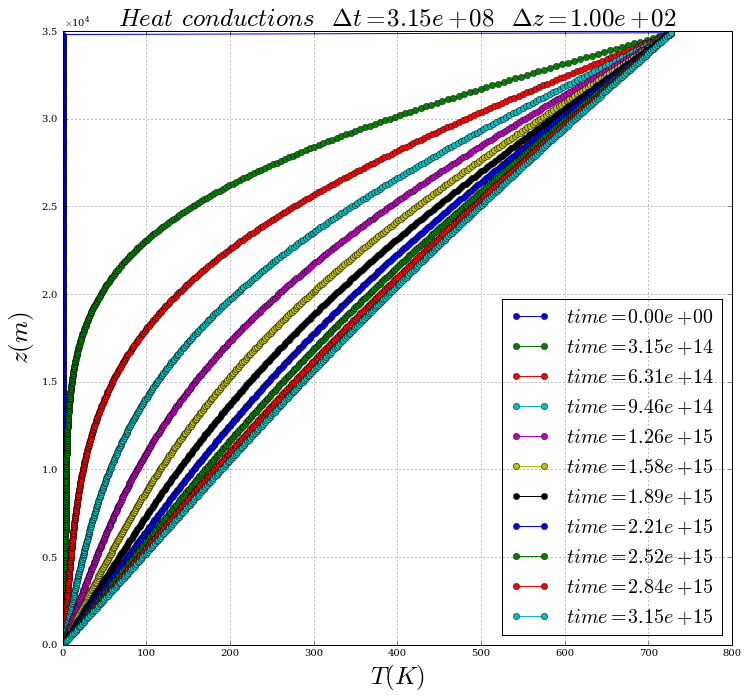

In [5]:
pretty_plot(T_out, prop, '-o')

La funcion *solve_explicito* nos devuelve dos cosas. Una son los array de temperatura para distintos tiempo, y lo otro es un diccionario de los valores usados para el calculo de la solución numérica.

In [6]:
prop

{'amount_plot': 11,
 'dt': 315360000.0,
 'dz': 100,
 'nt': 1000000,
 'nz': 350,
 't_total': 315360000000000.0,
 'z': 35000}

###Mediendo los tiempos

In [12]:
dz_1 = [1800, 1600, 1400, 1200, 1000, 800, 600, 400]
dz_3 = [1800, 1600, 1400, 1200, 1000, 800, 600, 400, 200, 100, 80]
dz_2 = [1800, 1600, 1400, 1200, 1000, 800, 600, 400, 200, 100, 80, 
                 70, 60, 50, 40, 30, 20]
dz_array = [dz_1, dz_2, dz_3]
metodos= ['explicit_py', 'explicit_numba', 'explicit_slicing']

times = [[] for i in range(len(metodos))]

for i in range(len(metodos)):
    for j in range(len(dz_array[i])):
        a = time.time()
        u, prop = solve_explicit(dz=dz_array[i][j], metodo=metodos[i])
        b = time.time()
        times[i].append(b-a)

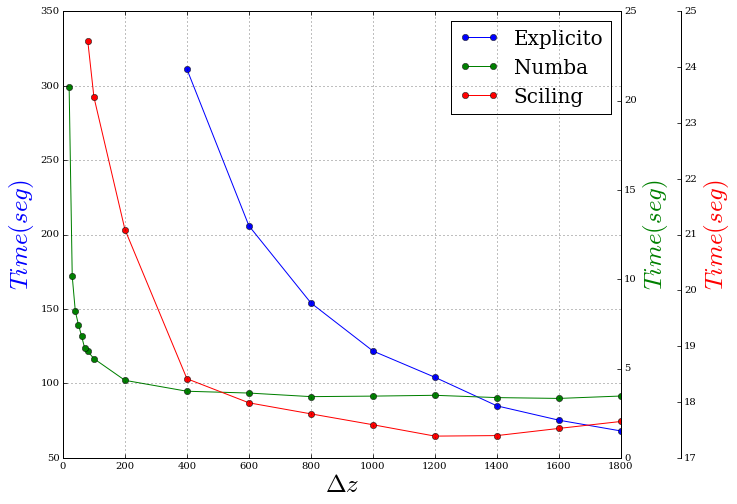

In [13]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt

if 1:
    plt.figure(figsize=[10,8])
    host = host_subplot(111, axes_class=AA.Axes)
    
    par1 = host.twinx()
    par2 = host.twinx()

    offset = 60
    new_fixed_axis = par2.get_grid_helper().new_fixed_axis
    par2.axis["right"] = new_fixed_axis(loc="right",
                                        axes=par2,
                                        offset=(offset, 0))

    par2.axis["right"].toggle(all=True)

    host.set_xlabel(r'$\Delta z$')
    host.set_ylabel('$Time(seg)$')
    par1.set_ylabel('$Time(seg)$')
    par2.set_ylabel('$Time(seg)$')

    p1, = host.plot(dz_array[0], times[0], 'o-', label="Explicito")
    p2, = par1.plot(dz_array[1], times[1], 'o-', label="Numba")
    p3, = par2.plot(dz_array[2], times[2], 'o-', label="Sciling")

    host.legend()

    host.axis["left"].label.set_color(p1.get_color())
    par1.axis["right"].label.set_color(p2.get_color())
    par2.axis["right"].label.set_color(p3.get_color())

    plt.draw()
    plt.grid(True)
    
    plt.show()

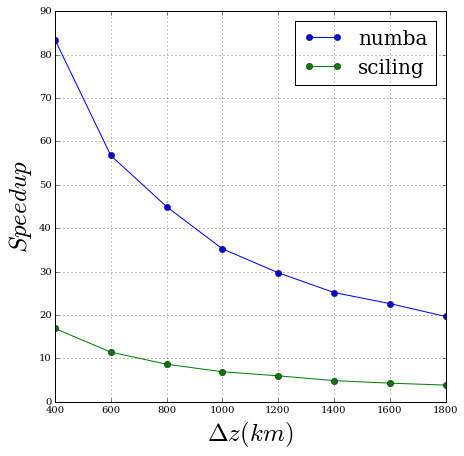

In [16]:
up_numba= []
up_sciling = []
for i in range(len(dz_1)):
    up_numba.append(times[0][i]/times[1][i])
    up_sciling.append(times[0][i]/times[2][i])
    
fig, ax = plt.subplots(figsize=(7,7))
plt.plot(dz_1, up_numba, '-o', label='numba')
plt.plot(dz_1, up_sciling, '-o', label='sciling')
plt.xlabel(r'$\Delta z(km)$')
plt.ylabel(r'$Speedup$')
plt.legend(loc = 'best')
plt.grid(True)

Viendo el gran speedup obtenido por el uso de Numba, podemos correr otra simulación con un $\Delta z$ mucho más chico que el inicial.

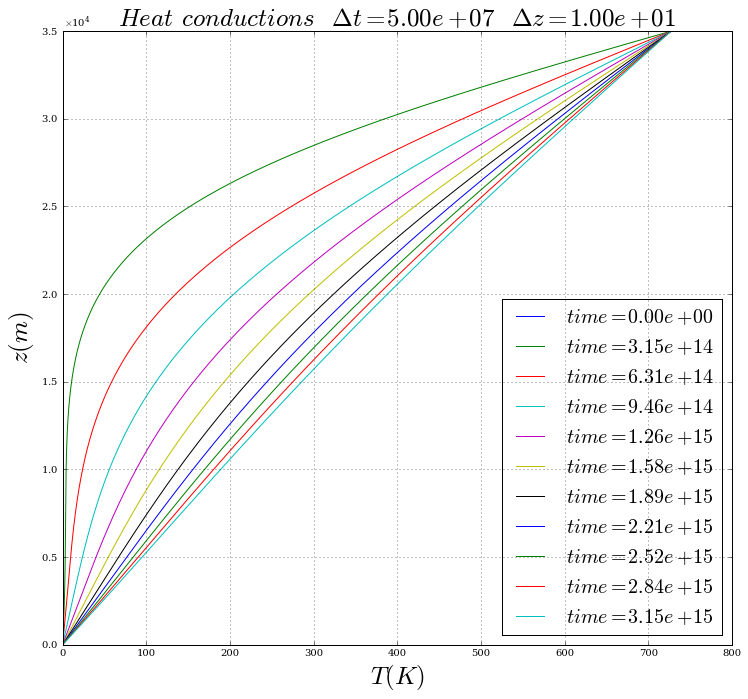

In [8]:
T_out, prop = solve_explicit(dz=10, amount_plot=10, metodo='explicit_numba')
pretty_plot(T_out, prop)

Observar que en esta ultima simulación, logramos bajar 2 ordenes de magnitud en $\Delta z$ (de 1800 a 10) y un orden de magnitud en $\Delta t$ (de $e^{8}$ a $e^{7}$).  

Siguiente paso: **Método Implícito**

######The cell below loads the style of the notebook.

In [1]:
#Este asombroso css es trabajo de @LorenaABarba
from IPython.core.display import HTML
css_file = './style/css/IPython_personal_style.css'
HTML(open(css_file, "r").read())